In [1]:
# sys, file and nav packages:
import datetime as dt

# math packages:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF

# charting:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import ticker
from matplotlib import colors
from matplotlib.gridspec import GridSpec
import seaborn as sns

# home brew utitilties
import resources.utility_functions as ut
import resources.abundance_classes as ac
import resources.chart_kwargs as ck

import resources.sr_ut as sut

# images and display
import base64, io, IPython
from PIL import Image as PILImage
from IPython.display import Markdown as md
from IPython.display import display, Math, Latex


# set some parameters:
today = dt.datetime.now().date().strftime("%Y-%m-%d")
start_date = '2020-03-01'
end_date ='2021-05-31'

a_fail_rate = 50

unit_label = 'pcs_m'

# name of the output folder:
name_of_project = 'bassin_report_all'

a_color = 'dodgerblue'

# set the maps
bassin_map = PILImage.open("resources/maps/survey_locations_all.jpeg")
bassin_pallette = {'rhone':'dimgray', 'aare':'salmon', 'linth':'tan', 'ticino':'steelblue', 'reuss':'purple'}

# define the feature level and components
comps = ['linth', 'rhone', 'aare', 'ticino']
comp_labels = {"linth":"Linth/Limmat", "rhone":"Rhône", 'aare':"Aare", "ticino":"Ticino/Cerisio", "reuss":"Reuss"}
comp_palette = {"Linth/Limmat":"dimgray", "Rhône":"tan", "Aare":"salmon", "Ticino/Cerisio":"steelblue", "Reuss":"purple"}

# explanatory variables:
luse_exp = ['% to buildings', '% to recreation', '% to agg', '% to woods', 'streets km', 'intersects']

# columns needed
use_these_cols = ['loc_date' ,
                  '% to buildings',
                  '% to trans', 
                  '% to recreation',
                  '% to agg',
                  '% to woods',
                  'population',
                  'river_bassin',
                  'water_name_slug',
                  'streets km',
                  'intersects',
                  'length',
                  'groupname',
                  'code'
                 ]

# these are default
top_name = ["All survey areas"]

# add the folder to the directory tree:
project_directory = ut.make_project_folder('output', name_of_project)

# get your data:
survey_data = pd.read_csv('resources/results_with_land_use_2015.csv')
river_bassins = ut.json_file_get("resources/river_basins.json")
dfBeaches = pd.read_csv("resources/beaches_with_land_use_rates.csv")
dfCodes = pd.read_csv("resources/codes_with_group_names_2015.csv")
dfDims = pd.read_csv("resources/dims_data.csv")

# set the index of the beach data to location slug
dfBeaches.set_index('slug', inplace=True)

# map locations to feature names
location_wname_key = dfBeaches.water_name_slug

# map water_name_slug to water_name
wname_wname = dfBeaches[['water_name_slug','water_name']].reset_index(drop=True).drop_duplicates()
wname_wname.set_index('water_name_slug', inplace=True)
        
def make_plot_with_spearmans(data, ax, n):
    """Gets Spearmans ranked correlation and make A/B scatter plot. Must proived a
    matplotlib axis object.
    """    
    sns.scatterplot(data=data, x=n, y=unit_label, ax=ax, color='black', s=30, edgecolor='white', alpha=0.6)
    corr, a_p = stats.spearmanr(data[n], data[unit_label])
    
    return ax, corr, a_p

dfCodes.set_index("code", inplace=True)

# these descriptions need to be shortened for display
dfCodes = sut.shorten_the_value(["G74", "description", "Insulation: includes spray foams"], dfCodes)
dfCodes = sut.shorten_the_value(["G940", "description", "Foamed EVA for crafts and sports"], dfCodes)
dfCodes = sut.shorten_the_value(["G96", "description", "Sanitary-pads/tampons, applicators"], dfCodes)
dfCodes = sut.shorten_the_value(["G178", "description", "Metal bottle caps and lids"], dfCodes)
dfCodes = sut.shorten_the_value(["G82", "description", "Expanded foams 2.5cm - 50cm"], dfCodes)
dfCodes = sut.shorten_the_value(["G81", "description", "Expanded foams .5cm - 2.5cm"], dfCodes)
dfCodes = sut.shorten_the_value(["G117", "description", "Expanded foams < 5mm"], dfCodes)

# make a map to the code descriptions
code_description_map = dfCodes.description

# make a map to the code descriptions
code_material_map = dfCodes.material

# Transport and deposition: an empirical approach

The hydrologic conditions of rivers have an effect on the distance and direction that an object will travel. Large low density objects will most likely be transported to the next reservoir or area of reduced flow. Once in the area of reduced flow surface currents and wind will transport low density objects untill they degrade and sink or land on the shore, a few may make it to the next reservoir. High density objects will only be transported if the flow velocity and turbulence of the water are sufficient to keep the objects off the bottom. Once high density items enter a low velocity zone they tend to settle or sink.

## The test groups

This condition can be tested by grouping the results of most common objects with respect to the results of the test for association completed in section 2.2.4.1 and comparing those groups under two different or opposing land use profiles. The most common objects were grouped according to the following associations: 

1. __contributed:__ Objects that have multiple positive associations to land use features
   * cigarette ends
   * snack wrappers
   
2. __distributed:__ Objects that have few or no postive associations to land use features
   * fragmented plastics
   * plastic construction waste

The survey locations were grouped according to the following conditions:

1. Locations that have a percent of land attributed to buildings GREATER than the median: **urban**
2. Locations that have a percent of land attributed to buildings LESS than the median AND percent of land attributed to woods or agriculture greater than the median: **rural**

### The test

The behavior and transport of litter items along the shoreline has been classified as "bouncing" or "beaching". This refers to an objects likelihood of reaching the shoreline and staying or moving along with the current. __If the beaching behavior is due to hydrologic conditions elevated survey results may not be associated with the land use profile of the location(s) under consideration__.

## The survey environment


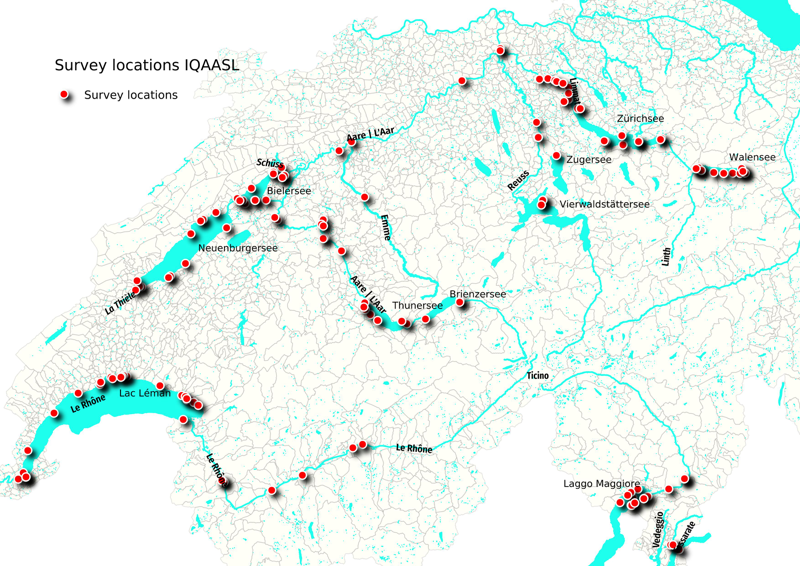

In [2]:
output = io.BytesIO()
bassin_map.thumbnail((800, 1200))
bassin_map.save(output, format='PNG')
encoded_string = base64.b64encode(output.getvalue()).decode()

html = '<img src="data:image/png;base64,{}"/>'.format(encoded_string)
IPython.display.HTML(html)

The differences in land use, and the density of that use have definite implications in regards to conducting litter-surveys and interpreting the results. In urban zones or regional agglomerations the land has been developed right up to the shoreline. In these areas there are a certain number of public beaches that are adequate for sampling, but the conditions on public beaches are not representative of the shoreline conditions. The majority of accesible shoreline is small strips of land between the lake or river and the structure used to contain it. The width of these strips is sensitive to changes in the lake level and wave action. In the summer time these areas are usually occupied by beachgoers who don't mind climbing over a few rocks to get to a more isolated spot.

Surveying in agricultural zones or woodlands presents the same challenges with different variables. Land that is used for agricultural purposes is exploited as close to the water front as is feasible to safely operate modern equipment. Long stretches of lake shore are bordered on one side by railways or lake shore roads that further reduce the access and width of survey locations. The space that is left between these different zones and the waters edge is usually occupied by a foot path or some kind of access road. If the survey is on a river then the path or access road is usually on a levee and the survey area consists of space between the base of the levee and the waters edge, this space reduces to zero for weeks at a time on many swiss rivers.

The presence of camping areas and nature reserves in many of the lake flood plains further defines the landscape from where these samples are drawn. Nature reserves restrict access to shoreline, surveyors in this project did not conduct any activitis in areas with restricted access unless written consent was given. There are many such locations throughout the watershed large and small. Camping areas create a clear line along the lake shore, usually a foot path, that leaves some space for seasonal expansion and contraction of the lake and the semi developed camping spaces.

#### Choosing survey sites

The survey locations were chosen based on the following criteria:

1. Data from previous surveys (SLR, MCBP)
2. Year round safe access
3. Within 30 minutes walking distance from nearest public transport

#### Sampling frequency and locations

Intitially at least two regions on each lake were designated to recieve monthly samples:

1. A location with public access closest to the primary river source
2. A location with public access closest to the primary river drainage

With these two locations as anchor points, other locations were selected randomly in between the discharge areas and the drainage areas of each lake. With the intention of connecting the two anchor points by collecting samples from different locations between them. In total 385 litter-surveys were conducted within the four survey areas touching 77 municipalities with a combined population of 1,735,000.

In [3]:
a_data = survey_data.copy()
a_dated = a_data[(a_data.date >= start_date)&(a_data.date <= end_date)].copy()

# format columns and slice by date
a_data['loc_date']=tuple(zip(a_data.location, a_data.date))
a_data['date']=pd.to_datetime(a_data['date'], format='%Y-%m-%d')
a_data = a_data[(a_data.date >= start_date)&(a_data.date <= end_date)]

# combine lugano and maggiore
a_data['river_bassin'] = a_data.river_bassin.where(a_data.river_bassin != 'tresa', 'ticino' )

# combine reuss and linth
a_data['river_bassin'] = a_data.river_bassin.where(a_data.river_bassin != 'reuss', 'linth' )

# convert meters of streets to kilometers
a_data['streets'] = a_data.streets.astype('int')
a_data['streets km'] = a_data.streets/1000

# make a p/50m column, keep the pcs_m column
a_data['p/50m'] = (a_data.pcs_m *50).astype('int')

# Combine the different sizes of fragmented plastics and styrofoam
# the codes for the foams, these will be called Gfoam
some_foams = ['G81', 'G82', 'G83']

# the codes for the fragmented plastics, these will be called Gfrags
some_frag_plas = list(a_data[a_data.groupname == 'plastic pieces'].code.unique())

# this extracts and aggregates the members of the two code groups, returns a dataframe
the_plast_rows = sut.create_aggregate_groups(a_data, codes_to_agg=some_frag_plas,a_model_code="G79", a_new_code="Gfrags")
the_foam_rows = sut.create_aggregate_groups(a_data, codes_to_agg=some_foams, a_model_code="G82", a_new_code="Gfoam")

# the foam codes and fragmented plastic codes have been aggregated in to Gfrags and Gfoam
a_data = sut.replace_a_group_of_codes_with_one(a_data, new_code_values=[the_plast_rows, the_foam_rows], codes_to_replace=[*some_frag_plas, *some_foams])

# code and material totals
material_totals = a_data.groupby('material').quantity.sum()
code_totals = a_data.groupby(['code'], as_index=False).agg({'p/50m':'mean', 'quantity':'sum'})

# cumulative statistics for each code
code_totals["% of total"] = ((code_totals.quantity/code_totals.quantity.sum())*100).round(2)
code_totals["fail"] = code_totals.code.map(lambda x: a_data[(a_data.code == x) & (a_data.quantity > 0)].loc_date.nunique())
code_totals["fail rate"] = ((code_totals.fail/a_data.loc_date.nunique())*100).astype('int')
code_totals.set_index('code', inplace=True)
code_totals['material'] = code_totals.index.map(lambda x: code_material_map[x])
code_totals['item'] = code_totals.index.map(lambda x: code_description_map[x])

# survey totals
dt_all = a_data.groupby(['loc_date','location','river_bassin', 'water_name_slug','city','date'], as_index=False).agg({'p/50m':'sum', 'quantity':'sum'})

# if needed make a map of the median survey result for each location
# lat_lon_map = dfBeaches[['latitude', 'longitude']]

# this will produce a points layer on QGIS with the median p/100m and the total quantity:
# median_survey_result_all_locations = dt_all.groupby(['location', 'river_bassin','water_name_slug'], as_index=False).agg({"p/100m":"median", "loc_date":"nunique"})
# # median_survey_result_all_locations['p/50m'] = (median_survey_result_all_locations.p/100m * 100).astype('int')
# median_survey_result_all_locations['latitude'] = median_survey_result_all_locations.location.map(lambda x: lat_lon_map.loc[x].latitude)
# median_survey_result_all_locations['longitude'] = median_survey_result_all_locations.location.map(lambda x: lat_lon_map.loc[x].longitude)

fd = a_data.copy()
fd['survey area'] = fd.river_bassin.map(lambda x: ut.use_this_key(x, comp_labels))

# fd['p/m²'] = fd.quantity/fd.area
# gather the municpalities and the population:
fd_pop_map = dfBeaches.loc[fd.location.unique()][['city','population']].copy()
fd_pop_map.drop_duplicates(inplace=True)
fd_pop_map.set_index('city', drop=True, inplace=True)

# survey_totals feature data
fd_dt=dt_all.copy()
fd_dt['month'] = fd_dt.date.dt.month

# map survey total quantity to loc_date
fd_dq = fd_dt[['loc_date', 'quantity']].set_index('loc_date')

# material totals:
fd_mat_t = code_totals[['material', 'quantity']].groupby('material', as_index=False).quantity.sum()
fd_mat_t["% of total"] = fd_mat_t.quantity/fd_mat_t.quantity.sum()

# material totals
fd_mat_totals = fd_mat_t.sort_values(by='quantity', ascending=False)

cols_to_use = {'material':'Material','quantity':'Quantity', '% of total':'% of total'}
fd_mat_totals['% of total'] =(fd_mat_totals['% of total']*100).round(1)
fd_mat_totals['quantity']=fd_mat_totals.quantity.map(lambda x: '{:,}'.format(x))
fd_mat_totals['% of total']=fd_mat_totals['% of total'].map(lambda x:F"{x}%")
fd_mat_t = fd_mat_totals[cols_to_use.keys()].values

# summary statistics:
fd_n_samps = len(fd_dt)
fd_n_obj = fd.quantity.sum()
fd_n_locs = fd.location.nunique()
fd_n_munis = len(fd_pop_map.index)
fd_effected_population = fd_pop_map.sum()

fd_locs = fd.location.unique()
fd_samps = fd.loc_date.unique()

# gather the dimensional data for the time frame from dfDims
fd_dims= dfDims[(dfDims.location.isin(fd_locs))&(dfDims.date >= start_date)&(dfDims.date <= end_date)].copy()

# map the survey area name to the dims data record
m_ap_to_survey_area = fd[['location', 'river_bassin']].drop_duplicates().to_dict(orient='records')
a_new_map = {x['location']:x['river_bassin'] for x in m_ap_to_survey_area}

# make a survey area column in the dims data
fd_dims['survey area'] = fd_dims.location.map(lambda x: ut.use_this_key(x, a_new_map))

# map length and area from dims to survey data
st_map = fd_dims[['loc_date', 'length', 'area']].to_dict(orient='records')
amap = {x['loc_date']:{'length':x['length'], 'area':x['area']}for x in st_map}
trans = {x:F"{x}"for x in fd.loc_date.unique()}

def this_map(x,amap,trans, var='length'):
    try:
        data = amap[trans[x]][var]
    except:
        data = 0
    return data
  
    
fd['length'] = fd.loc_date.map(lambda x:  this_map(x,amap,trans, var='length'))
fd['area'] = fd.loc_date.map(lambda x:  this_map(x,amap,trans, var='area'))
fd['water'] = fd.location.map(lambda x: dfBeaches['water'][x])

# these surveys are missing area and length data. 
# use the average values from all the surveys at that location to fill in the missing valuesf
make_lengths = fd.loc[fd.location.isin(['baby-plage-geneva','quai-maria-belgia'])].groupby('location').agg({'length':'mean', 'area':'mean'})
fd.loc[fd.loc_date == ('baby-plage-geneva', '2021-04-14'), 'length'] = 84
fd.loc[fd.loc_date == ('baby-plage-geneva', '2021-04-14'), 'area'] = 355
fd.loc[fd.loc_date.isin([('quai-maria-belgia', '2021-02-28'), ('quai-maria-belgia', '2021-01-31')]), 'length'] = 34
fd.loc[fd.loc_date.isin([('quai-maria-belgia', '2021-02-28'), ('quai-maria-belgia', '2021-01-31')]), 'area'] = 145

#### Land use profile

The survey areas were grouped intially by river catchment area, for this report several catchment areas were combined:

1. Aare : Emme, Aare
2. Linth/Limmat : Reuss, Linth, Limmat
3. Rhône: Rhône
4. Ticino/Cerisio : Ticino, Lago di Lugano, Laggo Maggiore

*distribution of land use characteristics*

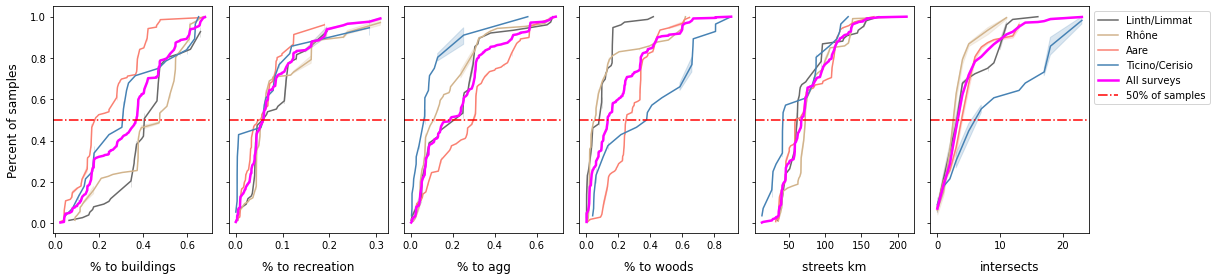

In [4]:
# gather the land use data for each location
luse_this_study = dfBeaches.loc[fd_locs].copy()

# the locations in the area of walensee are missing luse data
# we are only comparing locations that have a complete profile
lu_th_st = luse_this_study[luse_this_study.luse_total > 650]

# the data minus the locations with incomplete land use data
grtr_10 = fd[fd.location.isin(lu_th_st.index)].copy()
dt_nw = grtr_10.groupby(use_these_cols[:-2], as_index=False).agg({'p/50m':'sum'})

# the cumulative distributions for the different survey areas
ecdfs = {x:{} for x in comps}
ecdfs.update({"All surveys":{}})

fig, axs = plt.subplots(1,len(luse_exp), figsize=(17,4), sharey=True)

for i, n in enumerate(luse_exp):
    for element in comps:
        ax=axs[i]
        the_data = ECDF(dt_nw[dt_nw.river_bassin == element][n].values)
        ecdfs[element].update({n:the_data})
        
        x, y = the_data.x, the_data.y   

        sns.lineplot(x=x, y=y, ax=ax, label=comp_labels[element], color=comp_palette[comp_labels[element]])
    
    a_all_surveys =  ECDF(dt_nw[n].values)
    ecdfs["All surveys"].update({n:a_all_surveys})
    
    x, y = a_all_surveys.x, a_all_surveys.y
    sns.lineplot(x=x, y=y, ax=ax, label="All surveys", color="magenta", linewidth=2.5)
    ax.axhline(y=.5, linestyle="-.", color="red", label="50% of samples")
    
    if i == 0:
        ax.set_ylabel("Percent of samples", **ck.xlab_k)
    else:
        pass   
      
    ax.set_xlabel(n, **ck.xlab_k)
    handles, labels = ax.get_legend_handles_labels()
    ax.get_legend().remove()
plt.legend(handles, labels, bbox_to_anchor=(1,1))       
plt.tight_layout()
plt.show()  

The survey locations in the Rhône survey area (RSA) and Linth/Limmat survey area (LSA) had the greatest median amount of land attributed to buildings, 47% and 40% respectively and the least amount attributed to woods, 5% and 8%. The Aare survey area (ASA) had the lowest median amount of land attributed to buildings, 16% and the greatest amount of land attributed to aggriculture, 30%. The amount of land attributed to recreation represents sports fields, public beaches and other public gathering places. When compared to the allocation rates of other attributes this value is comparable between the survey areas.

*cumulative totals all survey areas*

In [5]:
# # make a loc_date column and get the unique values
# fd_dims['loc_date'] = list(zip(fd_dims.location, fd_dims.date))

# # key the quantity from the survey totals to the dimensional data
# try_this = {x:fd_dt[fd_dt.loc_date == x]['quantity'].to_numpy()[0] for x in fd_dt.loc_date.unique()}

# # map quantity per survey to the dims data
# fd_dims['quantity'] = fd_dims.loc_date.map(lambda x: ut.use_this_key(x, try_this))

# # keep the dims that did not get tagged with a qty
# no_qty = fd_dims[fd_dims.quantity == 'bad key']

# # drop the dims that did not match
# som_dims = fd_dims[fd_dims.quantity != 'bad key'].copy()
# som_dims['water_name_slug'] = som_dims.location.map(lambda x: location_wname_key.loc[x])

# # identify the surveys with no matching dimensional data
# no_matching_dim_records = [x for x in list(fd_samps) if x not in list(fd_dims.loc_date.unique())]

# # lists of lakes and rivers
# # lakes = dfBeaches.loc[(dfBeaches.index.isin(fd_locs))&(dfBeaches.water == 'l')]['water_name'].unique()
# # rivers = dfBeaches.loc[(dfBeaches.index.isin(fd_locs))&(dfBeaches.water == 'r')]['water_name'].unique()

# # check the number of samples between the dims data and the survey data
# # chk_d = list(som_dims.loc_date.unique())
# # chk_d2 = list(fd_dt.loc_date.unique())

# # the locations should have been previously identified:
# # [x for x in chk_d2 if x not in chk_d]

# dims_table = som_dims.groupby(['survey area']).agg({'quantity':'sum','total_w':'sum', 'mac_plast_w':'sum', 'area':'sum', 'length':'sum'})

# # collect the number of samples from the survey total data:
# for name in dims_table.index:
#     dims_table.loc[name, 'samples'] = fd_dt[fd_dt.river_bassin == name].loc_date.nunique()
    
# # get the sum of all survey areas
# dims_table.loc['All survey areas']= dims_table.sum(numeric_only=True, axis=0)
# dims_table.sort_values(by=["quantity"], ascending=False, inplace=True)

# # for display
# dims_table.rename(columns={'samples':'samples','quantity':'items', 'total_w':'total kg', 'mac_plast_w':'plastic kg', 'area':'m²', 'length':'meters'}, inplace=True)

# # order the columns
# dims_table = dims_table[['samples', *dims_table.columns[:-1]]]

# # format kilos
# dims_table['plastic kg'] = dims_table['plastic kg']/1000

# # format for printing
# dims_table = dims_table.applymap(lambda x: '{:,}'.format(int(x)))
# dims_table.reset_index(inplace=True)

# a_color='dodgerblue'

# fig, axs = plt.subplots(figsize=(len(dims_table.columns)*1.2,len(dims_table)*.8))
# ut.hide_spines_ticks_grids(axs)

# the_first_table_data = axs.table(dims_table.values,  colLabels=dims_table.columns, colWidths=[.25, *[.12]*6], bbox=[0, 0, 1, 1])

# a_summary_table_one = sut.make_a_summary_table(the_first_table_data,dims_table.values,dims_table.columns, a_color, s_et_bottom_row=False)

# a_summary_table_one.get_celld()[(0,0)].get_text().set_text(" ")

# plt.show()
# plt.tight_layout()
# plt.close()

## Test results

In [6]:
# # scatter plot of survey totals
# sns.set_style('whitegrid')

# # location of the tick marks
# months = mdates.MonthLocator(interval=1)
# months_fmt = mdates.DateFormatter('%b')
# days = mdates.DayLocator(interval=7)


# fd_dt['survey area'] = fd_dt.river_bassin.map(lambda x: ut.use_this_key(x, comp_labels))
# dist_all_surveys = ECDF(fd_dt['p/50m'].values)

# fig, ax = plt.subplots(figsize=(6,5))

# sns.scatterplot(data=fd_dt, x='date', y='p/50m', hue='survey area', palette=comp_palette, s=34, ec='white', ax=ax)

# ax.set_xlabel("")
# ax.set_ylabel("p/50m", **ck.xlab_k14)
# ax.xaxis.set_minor_locator(days)
# ax.xaxis.set_major_formatter(months_fmt)
# ax.legend( loc='upper right')

# plt.tight_layout()
# plt.show()
# plt.close()

# <!-- The standard reporting unit for beach litter surveys is pieces per 100m which is big for many locations in the survey area. The standard is based on the marine environment where there are long stretches of homogeonous landscape and adequate space to allow for tidal fluctuations. In Switzerand the amount of land left for rivers and lakes is much smaller and the samples are smaller. The median survey length for 2020-2021 was 45 meters, therfore all results are reported in **pieces of trash for every 50 meters** (p/50m).  -->

# summary stats table
# labels for the .describe function
change_names = {'count':'# samples',
                'mean':'average p/50m',
                'std':'standard deviation',
                'min p/50m':'min',
                '25%':'25%', 
                '50%':'50%',
                '75%':'75%',
                'max':'max p/50',
                'min':'min p/50',
                'total objects':'total objects',
                '# locations':'# locations',
                'survey year':'survey year'
               }

def anew_dict(x):
    new_dict = {}
    for param in x.index:
        new_dict.update({change_names[param]:x[param]})
    return new_dict  

# # format the out put from pd.describe of the survey density
# desc_2020 = fd_dt['p/50m'].describe().round(2)

# # add quantity and samples
# desc_2020['total objects'] = fd_dt.quantity.sum()
# desc_2020['# locations'] = fd.location.nunique()

# # format the data for the table
# combined_summary = pd.Series(anew_dict(desc_2020))
# not_formatted = combined_summary[-1]
# combined_summary = [(x, "{:,}".format(int(combined_summary[x]))) for x in combined_summary.index[:-1]]
# combined_summary.append((desc_2020.index[-1], int(not_formatted) ))

# fig, ax = plt.subplots(figsize=(3,6))

# a_col = ["All survey areas", 'total']

# axone = ax
# ut.hide_spines_ticks_grids(axone)
# a_table = axone.table(cellText=combined_summary[:-1],  colLabels=a_col, colWidths=[.5,.25,.25], loc='lower center', bbox=[0,0,1,1])
# the_material_table_data = sut.make_a_summary_table(a_table,combined_summary[:-1],a_col, s_et_bottom_row=False)

# plt.tight_layout()
# plt.show()

# # the material total table
# fig, ax = plt.subplots(figsize=(4,7))

# ut.hide_spines_ticks_grids(ax)
# ax.set_xlabel(" ")
# a_table = ax.table(cellText=fd_mat_t,  colLabels=list(cols_to_use.values()), colWidths=[.4, .3,.3], loc='lower center', bbox=[0,0,1,1])
# the_material_table_data = sut.make_a_summary_table(a_table,fd_mat_totals,list(cols_to_use.values()), s_et_bottom_row=False)

# plt.show()
# plt.close()

# the most abundant
most_abundant = code_totals.sort_values(by="quantity", ascending=False)[:10].index

# found greater than 50% of the time
l_grtr_50 = code_totals[code_totals['fail rate'] >= 50].index

# the most common
most_common = list(set([*most_abundant, *l_grtr_50]))

# # the survey data of the most common
# m_common = code_totals.loc[most_common].sort_values(by="quantity", ascending=False).copy()

# # the total count for the most common codes
# rb_t_ten_total = m_common.quantity.sum()

# # # the % of total of the most common codes
# rb_t_ten_ptotal = rb_t_ten_total/code_totals.quantity.sum()
# # print(rb_t_ten_ptotal)

# # format values for table
# m_common['item'] = m_common.index.map(lambda x: code_description_map.loc[x])
# m_common['% of total'] = m_common["% of total"].map(lambda x: F"{x}%")
# m_common['quantity'] = m_common.quantity.map(lambda x: '{:,}'.format(x))
# m_common['fail rate'] = m_common['fail rate'].map(lambda x: F"{x}%")
# m_common['p/50m'] = m_common['p/50m'].map(lambda x: F"{np.ceil(x)}")

# # final table data
# cols_to_use = {'item':'Item','quantity':'Quantity', '% of total':'% of total', 'fail rate':'fail rate', 'p/50m':'p/50m'}
# all_survey_areas = m_common[cols_to_use.keys()].values

# a_color = 'dodgerblue'
# fig, axs = plt.subplots(figsize=(9,len(m_common)*.8))

# ut.hide_spines_ticks_grids(axs)

# the_first_table_data = axs.table(all_survey_areas,  colLabels=list(cols_to_use.values()), colWidths=[.48, .13,.13,.13, .13], bbox=[0, 0, 1, 1])

# a_summary_table_one = sut.make_a_summary_table(the_first_table_data,m_common,list(cols_to_use.values()), a_color)

# plt.show()
# plt.tight_layout()
# plt.close()

<!-- ### Survey results with respect to land use -->

<!-- __Significant associations__

The test for association reveals that 3/4 of the objects that are associated with food or tobacco consumption have a positive association with buildings, recreation and streets. Glass drink bottle pieces are also associated with buildings and food consumption but positive associations with other land use features is inconclusive. Taken as a whole, these four objects make up 26% of all objects found and they were all found in at least 50% of all the surveys. Snack wrappers and cigarette ends also have the highest average p/50m rating of all the most common objects. **CONT refers to the group of food and tobacco objects that have a positive association with the percent of land attributed to buildings and are in the most common**.

These results support the idea that litter survey results increased when samples are considered with respect to the level of urbanization within 1500m of the survey location. This finding is consitent with the results of studies completed in Switzerland and elsewhere. 

> There is a positive relationship between urbanization and beach litter density in general. The positive relationship can be associated specifically to objects related to the consumption of food or tobacco if the amount of developed infrastructure is considered.

This concept has been widely adopted in practice, if not in theory. In general the more an area is developed the more resources are attributed to maintenance and upkeep, this includes trash removal and street sweeping.

__Inconclusive assocciations__

The test for association with buildings was inconclusive for 8/12 of the most common objects. These objects, which were identified earlier, represent a larger portion of the total objects found,  6/8 they were found in at least half of all the surveys. An inconclusive association suggests that these objects are found at approximately the same rate indifferent of the land use profile of the survey location. The primary use case or source for these objects was considered carefully, in the case of fragmented plastics no specific use case was assumed objects.

1. Expanded foams: repair and maintenance of infrastructure, insulation of building facades
2. Plastic construction waste: repair and maintenance of infrastructure
3. Industrial pellets: plastics less than 5mm
4. Expanded foams less than 5mm: plastics less than 5mm
5. Insulation, spray foams: repair and maintenance of infrastructure
6. Cotton bud sticks : waste-water
7. Industrial sheeting: aggriculture: under the denomination 'plasticulture'
8. Fragmented plastics: fragmented plastics greater than 5mm

Foams are lightweight and especially sensitive to wind and surface currents. Because of their low densities, these objects as well as cotton bud sticks stay on or near the surface of the water for extended periods of time untill the wind or waves push them to the shore. Industrial pellets are often found with algae or floating organic material. Fragmented plastics and plastic construction waste include a much wider range of polymers some of which are relatively dense. **DIST is used to refer to this group of abundant, diverse objects with no or few definitive land use associations and not related to food or tobacco**. -->

<!-- ### Differences between survey areas

The differences in the survey areas could be defined as the differences in the land use profile of the survey locations and the economic development of the survey area. The RSA has a greater total items count than LSA or ASA despite having fewer samples within the same period. This difference can also be seen in the distribution of survey results, where the RSA has a much higher percentage of surveys greater than the national median.  -->

In [7]:
# eleminate surveys less than 10m and greater than 100m
# restricts surveys to locations on lakes
grtr_10 = grtr_10[(grtr_10.water == 'l')].copy()

# add different date identifiers
grtr_10['month'] = grtr_10.date.dt.month
# grtr_10['year'] = grtr_10.date.dt.year
# grtr_10['mo_year'] = list(zip(grtr_10['month'], grtr_10['year']))
grtr_10["eom"] = grtr_10.date.map(lambda x: pd.Period(x,freq='M').end_time.date())

def add_pctile_rate(x,ecdfs,feature):
    data = ecdfs['All surveys'][feature](x)
    return np.round((data*100),1)
  

# get the percentile ranking of the land use features for each location
grtr_10['b_group'] = grtr_10["% to buildings"].map(lambda x: add_pctile_rate(x,ecdfs,"% to buildings"))
grtr_10['a_group'] = grtr_10["% to agg"].map(lambda x: add_pctile_rate(x,ecdfs,"% to agg"))
grtr_10['w_group'] = grtr_10["% to woods"].map(lambda x: add_pctile_rate(x,ecdfs,"% to woods"))
grtr_10['r_group'] = grtr_10["% to recreation"].map(lambda x: add_pctile_rate(x,ecdfs,"% to recreation"))

# group all the land use % into called profile
# this is a unique identifier for each location
grtr_10['profile'] = list(zip(grtr_10["% to buildings"], grtr_10["% to agg"], grtr_10["% to woods"], grtr_10["% to recreation"]))

# make a list of the objects by their association to buildings, streets recreation and thier use
# food and drink
cont = ["G27", "G30", "G178", "G200"]

# objects with no or few associations and not related to tobacco or food
dist = list(set(most_common) - set(cont))

# lables for the two groups and a label to catch all the other objects
grtr_10['cont'] = 'part'
grtr_10['cont'] = grtr_10.cont.where(~grtr_10.code.isin(dist), 'dist')
grtr_10['cont'] = grtr_10.cont.where(~grtr_10.code.isin(cont), 'cont')

# survey totals of all locations with its land use profile
initial = ['loc_date','date','a_group', 'b_group', 'r_group', 'w_group', 'streets', 'intersects']
grtr_10dt=grtr_10.groupby(initial, as_index=False).agg({"p/50m":"sum", "quantity":"sum"})
grtr_10qkey = grtr_10dt[['loc_date', 'quantity']].set_index('loc_date')

# assigning survey totals to the cont and dist survey totals
def wtf(x, grtr_10key):
    return grtr_10key.loc[[x]].values[0][0]

# survey totals of CONT and DIST objects, 
second = ['river_bassin','location','loc_date','date','eom', 'a_group', 'b_group', 'r_group', 'w_group', 'streets', 'intersects','profile','cont']
grtr_10dtc=grtr_10.groupby(second, as_index=False).agg({"p/50m":"sum", "quantity":"sum"})

# adding the survey total of all objects to each record
grtr_10dtc['dt']= grtr_10dtc.loc_date.map(lambda x: wtf(x, grtr_10qkey))

# calculating the % total of CONT and DIST at each survey
grtr_10dtc['pt']= grtr_10dtc.quantity/grtr_10dtc.dt

the_dists = grtr_10dtc[grtr_10dtc.cont == 'dist']
the_conts = grtr_10dtc[grtr_10dtc.cont == 'cont']

# get the significance level for both groups
the_dists_m = the_dists['p/50m'].quantile(.6)
the_conts_m = the_conts['p/50m'].quantile(.6)

# establish the significance of each record:
grtr_10dtc['sig'] = False
grtr_10dtc.loc[grtr_10dtc.cont == 'dist', 'sig'] = grtr_10dtc.sig.where( grtr_10dtc['p/50m'] < the_dists_m, True)
grtr_10dtc.loc[grtr_10dtc.cont == 'cont', 'sig'] = grtr_10dtc.sig.where( grtr_10dtc['p/50m'] < the_conts_m, True)

grtr_10dtc['rural'] = ((grtr_10dtc.w_group > 50) | (grtr_10dtc.a_group > 50) ) & (grtr_10dtc.b_group < 50)

less_than = grtr_10dtc[(grtr_10dtc['rural'] == True)].location.unique()
grt_than = grtr_10dtc[(grtr_10dtc['rural'] == False)].location.unique()

# grtr_10allp wallensee locations were removed from the data for land use calculations
# the data was not available, the status of walensee locations will be determined by the
# comparing the population and the survey results of walensee locations against those
# that meet the final criteria

# add columns for all survey values
# grtr_10allp['cont'] = 'part'
# grtr_10allp['cont'] = grtr_10allp.cont.where(~grtr_10allp.code.isin(dist), 'dist')
# grtr_10allp['cont'] = grtr_10allp.cont.where(~grtr_10allp.code.isin(cont), 'cont')

In [8]:
# labels and pallettes for most common and use case
# group_names =[ 'plastic pieces',
#  'infrastructure',
#  'agriculture',
#  'packaging non food',
#  'micro plastics (< 5mm)',
#  'waste water',
#  'not classified',
#  'personal items',
#  'recreation',
#  'tobacco',
#  'food and drink',
# ]
# colors_palette2 = {'G117':'dimgray', 'micro plastics (< 5mm)': 'teal',
#     'G178': 'darkslategray',
#     'waste water': 'lightseagreen',
#     'tobacco':'darkorange',
#     'food and drink':'darkkhaki',
#     'agriculture':'rosybrown',
#     'infrastructure': 'salmon',
#     'G95':'magenta',
#     'G74':'green',
#     'packaging non food': 'maroon',
#     'plastic pieces':'brown',
#     'G208': 'turquoise',
#     'personal items':'indigo',
#     'G25': 'chocolate',
#     'recreation': 'goldenrod',
#     'not classified': 'tan'    
# }


# colors_palette = {'G117':'dimgray', 'G112': 'teal',
#     'G178': 'darkslategray',
#     'G200': 'lightseagreen',
#     'G27':'darkorange',
#     'G30':'darkkhaki',
#     'G67':'rosybrown',
#     'G89': 'salmon',
#     'G95':'magenta',
#     'G74':'slateblue',
#     'Gfoam': 'maroon',
#     'Gfrags':'brown',
#     'G208': 'turquoise',
#     'G124':'indigo',
#     'G25': 'chocolate',
#     'G31': 'goldenrod',
#     'G21': 'tan'    
# }

### Assessing composition

The behavior and transport of litter items along the shoreline has been classified as "bouncing" or "beaching". This refers to an objects likelihood of reaching the shoreline and staying or moving along with the current. Unless there is a dominating lake current or unusual event high density items will tend to sink and settle close to where they entered a lake.

This property should create areas or zones where these high density objects are consistently more abundant than other objects. Elevated survey results may not be associated with the land use profile. To test this case the survey results of two different groups were compared:

1. Locations that have a percent of land attributed to buildings GREATER than the median: **urban**
2. Locations that have a percent of land attributed to buildings LESS than the median AND percent of land attributed to woods or agriculture greater than the median: **rural**

The rural group had 142 surveys for 47 locations versus 158 surveys from 37 locations in the urban group.

In [9]:
dists = grtr_10dtc[(grtr_10dtc.cont == 'dist')][['loc_date', 'location', 'p/50m']].set_index('loc_date')
conts = grtr_10dtc[(grtr_10dtc.cont == 'cont')][['loc_date', 'p/50m']].set_index('loc_date')
conts.rename(columns={"p/50m":"cont"}, inplace=True)
dists.rename(columns={"p/50m":"dist"}, inplace=True)
c_v_d = pd.concat([dists, conts], axis=1)
c_v_d['dt'] = c_v_d.dist/c_v_d.cont
ratio_of_d_c_agg = c_v_d[c_v_d.location.isin(less_than)].dist.sum()/c_v_d[c_v_d.location.isin(less_than)].cont.sum()
ratio_of_d_c_urb= c_v_d[c_v_d.location.isin(grt_than)].dist.sum()/c_v_d[c_v_d.location.isin(grt_than)].cont.sum()
# print(ratio_of_d_c_agg, ratio_of_d_c_urb)

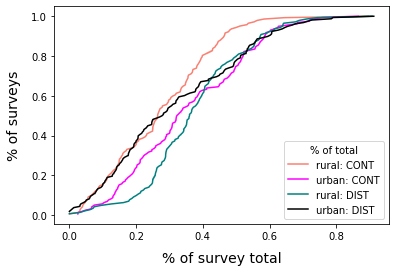

In [10]:
fig, ax = plt.subplots()

co_agecdf = ECDF(grtr_10dtc[(grtr_10dtc.location.isin(grt_than))&(grtr_10dtc.cont.isin(['cont']))]["pt"])
di_agecdf = ECDF(grtr_10dtc[(grtr_10dtc.location.isin(grt_than))&(grtr_10dtc.cont.isin(['dist']))]["pt"])

cont_ecdf = ECDF(grtr_10dtc[(grtr_10dtc.location.isin(less_than))&(grtr_10dtc.cont.isin(['cont']))]["pt"])
dist_ecdf = ECDF(grtr_10dtc[(grtr_10dtc.location.isin(less_than))&(grtr_10dtc.cont.isin(['dist']))]["pt"])

sns.lineplot(x=cont_ecdf.x, y=cont_ecdf.y, color='salmon', label="rural: CONT", ax=ax)
sns.lineplot(x=co_agecdf.x, y=co_agecdf.y, color='magenta', ax=ax, label="urban: CONT")
sns.lineplot(x=dist_ecdf.x, y=dist_ecdf.y, color='teal', label="rural: DIST", ax=ax)
sns.lineplot(x=di_agecdf.x, y=di_agecdf.y, color='black', label="urban: DIST", ax=ax)

ax.set_xlabel("% of survey total", **ck.xlab_k14)
ax.set_ylabel("% of surveys", **ck.xlab_k14)
plt.legend(loc='lower right', title="% of total")

plt.show()

In [11]:
# the survey results to test
corr_data = grtr_10[(grtr_10.code.isin(most_common))].copy()
results_sprmns = {}
for i,code in enumerate(most_common):
    data = corr_data[corr_data.code == code]
    for j, n in enumerate(luse_exp):
        corr, a_p = stats.spearmanr(data[n], data[unit_label])
        results_sprmns.update({code:{"rho":corr, 'p':a_p}})



### Seasonal variations

Seasonal variations of beach litter suvey results has been documented under many conditions and many environments. In 2018 the SLR reported the maximum value in July and the minimum in November. The year 2020-2021 presents the same results.   

In [17]:
# helper dict for converting ints to months
months={
    0:'Jan',
    1:'Feb',
    2:'Mar',
    3:'Apr',
    4:'May',
    5:'Jun',
    6:'Jul',
    7:'Aug',
    8:'Sep',
    9:'Oct',
    10:'Nov',
    11:'Dec'
}

m_dt = grtr_10.groupby(['loc_date', 'date','cont'], as_index=False).agg({'quantity':'sum', 'p/50m':'sum'})

# sample totals all objects
m_dt_t = grtr_10.groupby(['loc_date','date','month', 'eom'], as_index=False).agg({'p/50m':'sum'})
m_dt_t.set_index('date', inplace=True)

# data montlhy median survey results CONT, DIST and survey total
fxi=m_dt.set_index('date', drop=True)
data1 = fxi[fxi.cont == 'cont']["p/50m"].resample("M").mean()
data2 = fxi[fxi.cont == 'dist']["p/50m"].resample("M").mean()
# data3 = m_dt_t['p/50m'].resample("M").mean()

*average monthly survey total*

In [18]:
# helper tool for months in integer order
def new_month(x):
    if x <= 11:
        this_month = x
    else:
        this_month=x-12    
    return this_month


# fig, ax = plt.subplots()
    
# this_x = [i for i,x in  enumerate(data3.index)]
# this_month = [x.month for i,x in enumerate(data3.index)]

# ax.bar(this_x, data3.to_numpy(), label='median survey total', linewidth=1, color="dodgerblue", alpha=0.6)

# handles, labels = ax.get_legend_handles_labels()
# ax.xaxis.set_major_locator(ticker.FixedLocator([i for i in np.arange(len(this_x))]))

# axisticks = ax.get_xticks()
# ax.set_ylabel("p/50m", **ck.xlab_k14)

# labelsx = [months[new_month(x-1)] for x in  this_month]

# plt.xticks(ticks=axisticks, labels=labelsx)
# plt.show()


*total number of surveys and items per month*

*monthly average survey total CONT and DIST*

In [19]:
# fig, ax = plt.subplots()
    
# this_x = [i for i,x in  enumerate(data1.index)]
# this_month = [x.month for i,x in enumerate(data1.index)]

# ax.bar(this_x, data1.to_numpy(), label='CONT', bottom=data2.to_numpy(), linewidth=1, color="salmon", alpha=0.6)
# ax.bar([i for i,x in  enumerate(data2.index)], data2.to_numpy(), label='DIST', linewidth=1,color="darkslategray", alpha=0.6)

# handles, labels = ax.get_legend_handles_labels()
# ax.xaxis.set_major_locator(ticker.FixedLocator([i for i in np.arange(len(this_x))]))

# ax.set_ylabel("p/50m", **ck.xlab_k14)

# axisticks = ax.get_xticks()
# labelsx = [months[new_month(x-1)] for x in  this_month]

# plt.xticks(ticks=axisticks, labels=labelsx)
# plt.legend(handles, labels, bbox_to_anchor= (1, 1.02), ncol=2, loc='lower right')
# plt.show()

In [20]:
# the monthly average discharge rate of the three rivers where the majority of the samples are
aare_schonau = [61.9, 53, 61.5, 105, 161, 155, 295, 244, 150, 106, 93, 55.2, 74.6, 100, 73.6, 92.1]
rhone_scex =   [152, 144, 146, 155, 253, 277, 317, 291, 193, 158, 137, 129, 150, 146, 121, 107]
linth_weesen = [25.3, 50.7, 40.3, 44.3, 64.5, 63.2, 66.2, 61.5, 55.9, 52.5, 35.2, 30.5, 26.1, 42.0, 36.9]

*monthly survey results and river discharge rates m³/second*

*April and May 2021 are rolling averages, data not available*

*source : https://www.hydrodaten.admin.ch/en/stations-and-data.html?entrance_medium=menu*

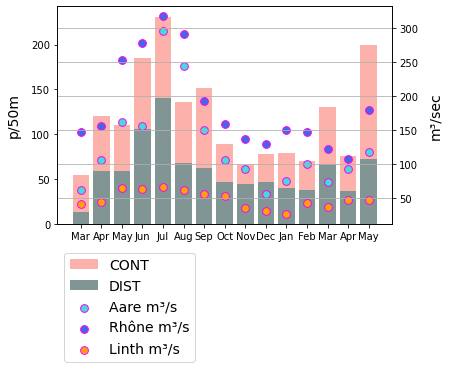

In [21]:
fig, ax = plt.subplots()
    
this_x = [i for i,x in  enumerate(data1.index)]
this_month = [x.month for i,x in enumerate(data1.index)]

twin_ax = ax.twinx()
twin_ax.grid(None)

ax.bar(this_x, data1.to_numpy(), label='CONT', bottom=data2.to_numpy(), linewidth=1, color="salmon", alpha=0.6)
ax.bar([i for i,x in  enumerate(data2.index)], data2.to_numpy(), label='DIST', linewidth=1,color="darkslategray", alpha=0.6)

sns.scatterplot(x=this_x,y=[*aare_schonau[2:], np.mean(aare_schonau)], color='turquoise',  edgecolor='magenta', linewidth=1, s=60, label='Aare m³/s', ax=twin_ax)
sns.scatterplot(x=this_x,y=[*rhone_scex[2:], np.mean(rhone_scex)], color='royalblue',  edgecolor='magenta', linewidth=1, s=60, label='Rhône m³/s', ax=twin_ax)
sns.scatterplot(x=this_x,y=[*linth_weesen[2:], np.mean(linth_weesen), np.mean(linth_weesen)], color='orange', edgecolor='magenta', linewidth=1, s=60, label='Linth m³/s', ax=twin_ax)
handles, labels = ax.get_legend_handles_labels()
handles2, labels2 = twin_ax.get_legend_handles_labels()
ax.xaxis.set_major_locator(ticker.FixedLocator([i for i in np.arange(len(this_x))]))

ax.set_ylabel("p/50m", **ck.xlab_k14)
twin_ax.set_ylabel("m³/sec", **ck.xlab_k14)

axisticks = ax.get_xticks()
labelsx = [months[new_month(x-1)] for x in  this_month]

plt.xticks(ticks=axisticks, labels=labelsx)
plt.legend([*handles, *handles2], [*labels, *labels2], bbox_to_anchor=(0,-.1), loc='upper left', fontsize=14)

plt.show()

The ratio of DIST objects to CONT objects in the rural group was 1.7, in the urban group it was 0.81. On a per survey basis, DIST objects were a greater percent of the total in all surveys from rural locations. In urban locations the ratio of DIST to CONT is the inverse of the rural locations and for approximately 20% of the surveys in urban locations the ratio of DIST to CONT is very close to 1.  

> Sample results from rural locations had a greater portion of trash attributed to fragmented plasics, construction plastics and foams.

*difference in composition of rural and urban litter surveys*

*samples with a higher percentage of DIST objects and lower percentage of CONT objects were more likely in rural environments*

On a p/50m basis DIST objects were found at higher rates at rural survey locations as opposed to urban. Both urban and rural locations recorded survey values of zero at least once.

### Assessing survey totals

*median survey result for DIST objects in rural and urban environments*

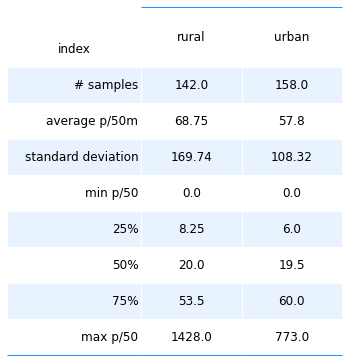

In [22]:
a = grtr_10dtc[(grtr_10dtc.location.isin(less_than))&(grtr_10dtc.cont == 'dist')].groupby(['loc_date', 'cont'])['p/50m'].sum()
b = grtr_10dtc[(grtr_10dtc.location.isin(grt_than))&(grtr_10dtc.cont == 'dist')].groupby(['loc_date', 'cont'])['p/50m'].sum()

l = a.describe().round(2)
m = b.describe().round(2)



# format the data for the table
cl = pd.Series(anew_dict(l), name='rural')
cm = pd.Series(anew_dict(m), name='urban')

data = pd.concat([cl,cm], axis=1)
data.reset_index(inplace=True)
fig, axs = plt.subplots(figsize=(6,6.4))

ut.hide_spines_ticks_grids(axs)

the_first_table_data = axs.table(data.values,  colLabels=list(data.columns), colWidths=[.4, .3, .3], bbox=[0, 0, 1, 1])

a_summary_table_one = sut.make_a_summary_table(the_first_table_data,data.values,list(data.columns), a_color)

plt.show()
plt.tight_layout()
plt.close()

The median survey result and the percent of total for all the objects in the DIST group was equal to or greater in rural locations when compared to urban locations. 

*Rural: average p/50m and percent of total all DIST objects*

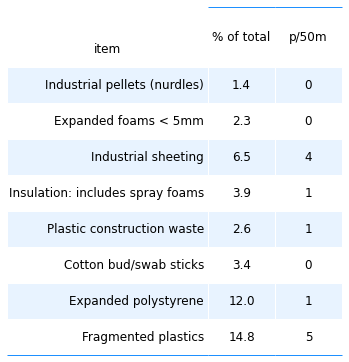

In [23]:
a = grtr_10[(grtr_10.location.isin(less_than))&(grtr_10.code.isin(["Gfrags", "Gfoam", "G89", "G67", "G74", "G117", "G95", "G112"]))].groupby(['loc_date', 'code'], as_index=False)['p/50m'].sum()

a_total = grtr_10[(grtr_10.location.isin(less_than))].quantity.sum()
b = grtr_10[(grtr_10.location.isin(less_than))&(grtr_10.code.isin(["Gfrags", "Gfoam", "G89", "G67", "G74", "G117", "G95", "G112"]))].groupby(['code']).quantity.sum()
b.rename("% of total", inplace=True)
frms = [a.groupby('code').median(), np.round((b/a_total)*100,1)]
data = pd.concat(frms, axis=1).round(2)
data['item'] = data.index.map(lambda x: code_description_map[x])
# data.round(2, inplace=True)
data.reset_index(drop=True, inplace = True)
data = data[data.columns[::-1]]

fig, axs = plt.subplots(figsize=(6,6.4))

ut.hide_spines_ticks_grids(axs)

the_first_table_data = axs.table(data.values,  colLabels=list(data.columns), colWidths=[.6, .2, .2], bbox=[0, 0, 1, 1])

a_summary_table_one = sut.make_a_summary_table(the_first_table_data,data.values,list(data.columns), a_color)

plt.show()
plt.tight_layout()
plt.close()

Indutrial pellets and small foam balls have a 0 median survey result, confirming the *transient* nature of these objects in the survey results. Objects less than 5mm have a decreasing surface-to-mass ratio making them more suceptible to bio-fouling and more likely to sink quicker than larger objects made from similar polymers. However, it was not uncommon to find *industrial pellets* and *small expanded foam balls* mixed in with floating organic material such as algae or grass clippings.

Identifying the exact type of microplastics was outside the scope of this project, however visible objects less than 5mm were collected and counted as part of the survey. Industrial plastic pellets and expanded foam beads can be indentified accurately therefore they were counted seperately from other objects less than 5mm.

*Urban: average p/50m and percent of total all DIST objects*

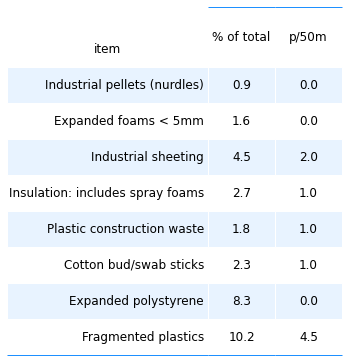

In [24]:
a = grtr_10[(grtr_10.location.isin(grt_than))&(grtr_10.code.isin(["Gfrags", "Gfoam", "G89", "G67", "G74", "G117", "G95", "G112"]))].groupby(['loc_date', 'code'], as_index=False)['p/50m'].sum()

a_total = grtr_10[(grtr_10.location.isin(grt_than))].quantity.sum()
b = grtr_10[(grtr_10.location.isin(less_than))&(grtr_10.code.isin(["Gfrags", "Gfoam", "G89", "G67", "G74", "G117", "G95", "G112"]))].groupby(['code']).quantity.sum()


b.rename("% of total", inplace=True)
frms = [a.groupby('code').median(), np.round((b/a_total)*100,1)]
data = pd.concat(frms, axis=1).round(2)
data['item'] = data.index.map(lambda x: code_description_map[x])
# data.round(2, inplace=True)
data.reset_index(drop=True, inplace = True)
data = data[data.columns[::-1]]

fig, axs = plt.subplots(figsize=(6,6.4))

ut.hide_spines_ticks_grids(axs)

the_first_table_data = axs.table(data.values,  colLabels=list(data.columns), colWidths=[.6, .2, .2], bbox=[0, 0, 1, 1])

a_summary_table_one = sut.make_a_summary_table(the_first_table_data,data.values,list(data.columns), a_color)

plt.show()
plt.tight_layout()
plt.close()

### The distribution of results with respect to land use

The survey results of the DIST group objects are very similar under both land use classes, there is more variance as the reported value increases but not so much that the distributions diverge. Given the standard deviation deviation of the samples and the high variance of beach-litter-survey data in general this is expected. The two sample Kolmogorov-Smirnov(KS) test(ks=0.073, p=0.808) of the two sets of survey results suggest that **DIST object distributions may not be diffrent**. The results from the Mann-Whitney *U* (MWU) (U=11445.0, p=0.762) **DIST object distributions may be equal**.  

On the other hand the CONT objects survey results diverge almost immediately according to rural or urban class. This is also expected if the test for association was correct, the rural locations have less buildings and more aggriculture or woods the two conditions together should reduce the amount of tobacco and food wrappers for that class.The KS and MWU tests both confirm the visual results that rural and urban survey results for **CONT objects most likely come from different distributions and they are not equal** (ks=0.284, pvalue<.0001), (U=7559.0, pvalue<.0001).

*Rural - Urban empirical cumulative distribution of survey results*

*left: DIST , right: CONT*

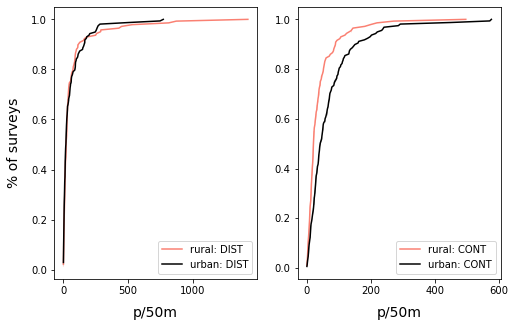

In [25]:
dist_results_agg = grtr_10dtc[(grtr_10dtc.location.isin(less_than))&(grtr_10dtc.cont == 'dist')].groupby(['loc_date', 'cont'])['p/50m'].sum().values
dist_results_urb = grtr_10dtc[(grtr_10dtc.location.isin(grt_than))&(grtr_10dtc.cont == 'dist')].groupby(['loc_date', 'cont'])['p/50m'].sum().values
a_d_ecdf = ECDF(dist_results_agg )
b_d_ecdf = ECDF(dist_results_urb )

# print(len(a_d_ecdf.x))
# print(len(b_d_ecdf.x))
# print(a_d_ecdf(85), b_d_ecdf(85))

cont_results_agg = grtr_10dtc[(grtr_10dtc.location.isin(less_than))&(grtr_10dtc.cont == 'cont')].groupby('loc_date')['p/50m'].sum().values
cont_results_urb = grtr_10dtc[(grtr_10dtc.location.isin(grt_than))&(grtr_10dtc.cont == 'cont')].groupby('loc_date')['p/50m'].sum().values
a_d_ecdf_cont = ECDF(cont_results_agg)
b_d_ecdf_cont = ECDF(cont_results_urb)

fig, ax = plt.subplots(1,2, figsize=(8,5))

axone = ax[0]
sns.lineplot(x=a_d_ecdf.x, y=a_d_ecdf.y, color='salmon', label="rural: DIST", ax=axone)
sns.lineplot(x=b_d_ecdf.x, y=b_d_ecdf.y, color='black', label="urban: DIST", ax=axone)
axone.set_xlabel('p/50m', **ck.xlab_k14)
axone.set_ylabel('% of surveys', **ck.xlab_k14)


axtwo = ax[1]
sns.lineplot(x=a_d_ecdf_cont.x, y=a_d_ecdf_cont.y, color='salmon', label="rural: CONT", ax=axtwo)
sns.lineplot(x=b_d_ecdf_cont.x, y=b_d_ecdf_cont.y, color='black', label="urban: CONT", ax=axtwo)

axtwo.set_xlabel('p/50m', **ck.xlab_k14)
axtwo.set_ylabel(' ')

plt.show()

In [26]:
# ks test implementation
# cannot reject the null hypothesis that DIST rural is the same as DIST urban
# p-value can be used to determine rejection of null hypothesis (i.e. p< 0.05 reject null)
# D close to 1 indicates the two samples are from different distributions
# D closer to 0 indicates the two samples are from the same distribution
# print(stats.ks_2samp(dist_results_agg, dist_results_urb, alternative='two-sided', mode='auto'))

# mann whitney implementation
# cannot reject the null hypothesis that DIST rural is identical to DIST urban
# For use with unmatched/unpaired data
# Null Hypothesis: The distributions are identical.
# If U is close to 1, the medians are very different
# If the medians are similar U will be close to n1*n2/2.
# where n1 is the number of samples in distribution 1 and n2 is the number of samples in distribution 2.

# print(stats.mannwhitneyu(dist_results_agg,dist_results_urb, alternative='two-sided'))

In [27]:
# the results for CONT objects
# print(stats.ks_2samp(cont_results_agg, cont_results_urb, alternative='two-sided', mode='auto'))
# print(stats.mannwhitneyu(cont_results_agg, cont_results_urb, alternative='two-sided'))

### The distribution of fragmented plastics and plastic construction waste with respect to land use

Within the DIST group there are two objects that most likely contain high density plastics, and are thus likely to sink faster than the other DIST objects and therefore accumulate at approximately the same rate. 

1. plastic construction waste
2. fragmented plastics

The distribution of the combined survey total of these two objects (HD) was compared between the two location classes, the combined results of cigarette ends and candy wrappers (FT) were chosen to represent the CONT group.

#### Results of KS test and Mann Whitney U

With respect to the DIST group the survey results for HD objects diverge at approximately the 65th percentile where the rural survey results are noticeably larger. According to the KS test (ks=0.092, pvalue=0.50) and MWU test (U=11592.0, pvalue=0.62) the distribution of HD objects under the two land use classes is not significantly different and may be equal. The differnces above the 65th percentile suggest that high survey values were recorded at more than one survey in rural locations.

Interestingly candy wrappers and cigarette ends maintain the same features as the parent distribution. The results of the KS test (ks=0.29, pvalue<.001) and MWU test (U=7647.5, p<.001) confirm the results of the parent group.


*Left: Rural - Urban distribution of fragmented and construction plastics*

*Right: Rural - Urban distribution of cigarette ends and candy wrappers*

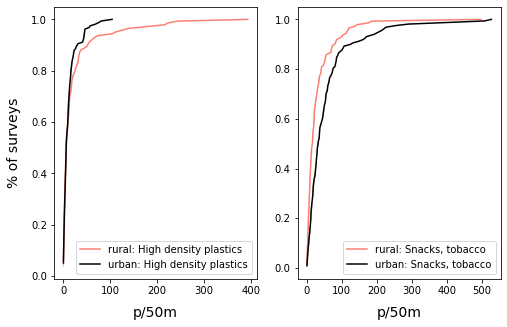

In [28]:
agg_dobj = grtr_10[(grtr_10.location.isin(less_than))&(grtr_10.code.isin(['Gfrags', 'G89']))].groupby(['loc_date'])['p/50m'].sum().values
buld_obj = grtr_10[(grtr_10.location.isin(grt_than))&(grtr_10.code.isin(['Gfrags', 'G89']))].groupby(['loc_date'])['p/50m'].sum().values

a_d_ecdf = ECDF(agg_dobj)
b_d_ecdf = ECDF(buld_obj)

# print(len(a_d_ecdf.x))
# print(len(b_d_ecdf.x))
# print(a_d_ecdf(17), b_d_ecdf(15))
# print(np.quantile(a_d_ecdf.x,.65))
# print(np.quantile(b_d_ecdf.x, .65))

agg_cont = grtr_10[(grtr_10.location.isin(less_than))&(grtr_10.code.isin(['G27', 'G30']))].groupby(['loc_date'])['p/50m'].sum().values
b_cont = grtr_10[(grtr_10.location.isin(grt_than))&(grtr_10.code.isin(['G27', 'G30']))].groupby(['loc_date'])['p/50m'].sum().values

a_c_ecdf = ECDF(agg_cont)
b_c_ecdf = ECDF(b_cont)

fig, ax = plt.subplots(1,2, figsize=(8,5))

axone = ax[0]
sns.lineplot(x=a_d_ecdf.x, y=a_d_ecdf.y, color='salmon', label="rural: High density plastics", ax=axone)
sns.lineplot(x=b_d_ecdf.x, y=b_d_ecdf.y, color='black', label="urban: High density plastics", ax=axone)
axone.set_xlabel('p/50m', **ck.xlab_k14)
axone.set_ylabel('% of surveys', **ck.xlab_k14)


axtwo = ax[1]
sns.lineplot(x=a_c_ecdf.x, y=a_c_ecdf.y, color='salmon', label="rural: Snacks, tobacco", ax=axtwo)
sns.lineplot(x=b_c_ecdf.x, y=b_c_ecdf.y, color='black', label="urban: Snacks, tobacco", ax=axtwo)

axtwo.set_xlabel('p/50m', **ck.xlab_k14)
axtwo.set_ylabel(' ')

plt.show()

In [29]:
# ks test implementation
# cannot reject the null hypothesis that DIST rural is the same as DIST urban
# p-value can be used to determine rejection of null hypothesis (i.e. p< 0.05 reject null)
# D close to 1 indicates the two samples are from different distributions
# D closer to 0 indicates the two samples are from the same distribution
# print(stats.ks_2samp(agg_dobj, buld_obj, alternative='two-sided', mode='auto'))

# mann whitney implementation
# cannot reject the null hypothesis that DIST rural is identical to DIST urban
# For use with unmatched/unpaired data
# Null Hypothesis: The distributions are identical.
# If U is close to 1, the medians are very different
# If the medians are similar U will be close to n1*n2/2.
# where n1 is the number of samples in distribution 1 and n2 is the number of samples in distribution 2.

# print(stats.mannwhitneyu(agg_dobj,buld_obj, alternative='two-sided'))

#### A/B test difference of means 

In [30]:
# print(stats.ks_2samp(agg_cont , b_cont,  alternative='two-sided', mode='auto'))
# print(stats.mannwhitneyu(agg_cont , b_cont, alternative='two-sided'))

##### *__fragmented plastics and plastic construction waste__*

*Difference of means rural - urban, method=shuffle, permutations=5000*

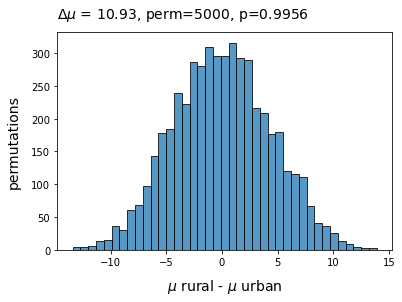

In [31]:
# pemutation test: of difference of means HD objects
agg_dobj = grtr_10[(grtr_10.location.isin(less_than))&(grtr_10.code.isin(['Gfrags', 'G89']))].groupby(['loc_date'], as_index=False)['p/50m'].sum()
buld_obj = grtr_10[(grtr_10.location.isin(grt_than))&(grtr_10.code.isin(['Gfrags', 'G89']))].groupby(['loc_date'], as_index=False)['p/50m'].sum()
# label the urban and rural results
agg_dobj['class'] = 'rural'
buld_obj['class'] = 'urban'

# merge into one 
objs_merged = agg_dobj.append(buld_obj)

# store the mean per class
the_mean = objs_merged.groupby('class')['p/50m'].mean()

# store the difference
mean_diff = the_mean.loc['rural'] - the_mean.loc['urban']
new_means=[]
# permutation resampling:
for element in np.arange(5000):
    objs_merged['new_class'] = objs_merged['class'].sample(frac=1).values
    b=objs_merged.groupby('new_class').mean()
    new_means.append((b.loc['rural'] - b.loc['urban']).values[0])
emp_p = np.count_nonzero(new_means <= (the_mean.loc['rural'] - the_mean.loc['urban'])) / 5000

# chart the results
fig, ax = plt.subplots()

sns.histplot(new_means, ax=ax)
ax.set_title(F"$\u0394\mu$ = {np.round(mean_diff, 2)}, perm=5000, p={emp_p} ", **ck.title_k14)
ax.set_ylabel('permutations', **ck.xlab_k14)
ax.set_xlabel("$\mu$ rural - $\mu$ urban", **ck.xlab_k14)
plt.show()

The average survey result of HD objects in rural locations was 22.93p/50m in urban locations it was 12p/50m. A permutation test on the difference of means was conducted on the condition *rural* / *urban*. The results from each group were labled and then the labels were shuffled randomly and the average of the two groups was calculated and the difference between the two recorded. There were 5,000 permutations with an average difference of -0.037 and p=0.99, confirming the previous results of the KS and MWU test that these two distributions may be equal and are most likely not different.

The permutation test on the FT objects confirms all previous results that these distributions are different.

##### *__cigarette ends and snack wrappers__*

*Difference of means rural - urban, method=shuffle, permutations=5000*

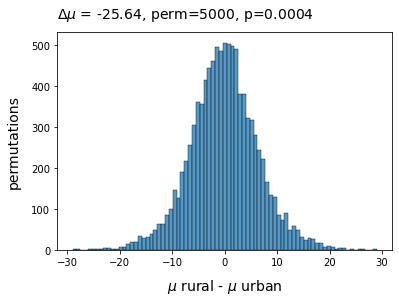

In [32]:
# pemutation test: of difference of means food objects
agg_cont = grtr_10[(grtr_10.location.isin(less_than))&(grtr_10.code.isin(['G27', 'G30']))].groupby(['loc_date'], as_index=False)['p/50m'].sum()
b_cont = grtr_10[(grtr_10.location.isin(grt_than))&(grtr_10.code.isin(['G27', 'G30']))].groupby(['loc_date'], as_index=False)['p/50m'].sum()
# label the urban and rural results
agg_cont['class'] = 'rural'
b_cont['class'] = 'urban'

# merge into one 
objs_merged = agg_cont.append(b_cont)

# store the mean per class
the_mean = objs_merged.groupby('class')['p/50m'].mean()

# store the difference
mean_diff = the_mean.loc['rural'] - the_mean.loc['urban']

# permutation resampling:
for element in np.arange(5000):
    objs_merged['new_class'] = objs_merged['class'].sample(frac=1).values
    b=objs_merged.groupby('new_class').mean()
    new_means.append((b.loc['rural'] - b.loc['urban']).values[0])
emp_p = np.count_nonzero(new_means <= (the_mean.loc['rural'] - the_mean.loc['urban'])) / 5000

# chart the results
fig, ax = plt.subplots()

sns.histplot(new_means, ax=ax)
ax.set_title(F"$\u0394\mu$ = {np.round(mean_diff, 2)}, perm=5000, p={emp_p} ", **ck.title_k14)
ax.set_ylabel('permutations', **ck.xlab_k14)
ax.set_xlabel("$\mu$ rural - $\mu$ urban", **ck.xlab_k14)
plt.show()

In [33]:
all_high_density = grtr_10[(grtr_10.code.isin(['Gfrags', 'G89', 'G95']))].groupby(['loc_date', 'location', 'river_bassin', 'intersects', 'water_name_slug'], as_index=False)['p/50m'].sum()
the_80th = all_high_density['p/50m'].quantile(.8)
all_high_density['rural'] = True
all_high_density['rural'] = all_high_density.rural.where(all_high_density.location.isin(less_than)==True, False)

grtr_80 = all_high_density[all_high_density['p/50m'] > the_80th].copy()
summary = grtr_80.groupby(['rural', 'location'], as_index=False).agg({'loc_date':'nunique', 'p/50m':'median' }).sort_values(by=['rural', 'p/50m'], ascending=False)
# grtr_80.groupby('rural').agg({'location':'nunique', 'loc_date':'nunique', 'p/50m':'median'})

In [34]:
these_beaches = dfBeaches.loc[summary.location.unique()]

these_stats = summary[['location', 'p/50m']].set_index('location')
export_these_map_points = pd.concat([these_beaches, these_stats], axis=1)

### Discussion

The distribution of the survey results for  *fragmented plastics* and *construction plastics* (HD) is very similar and most likely the same indifferent of survey area or the infrastructure within 1500m of the survey location. This is in contrast to objects whose source and use case are known to be associated with increased infrastructure and economic acitivity like food or tobacco products. HD have a variety of polymers, many of which have a density greater than water. 

The high density plastics tend to sink as soon as the hydrologic conditions permit. Low turbulence and low velocity are the conditions that encourage the settlement of high density plastics and minimize horizontal transport. Most of the survey locations have river or canal discharges within 1500m. Thus, the high velocity and turbulence of rivers or canals facilitate the transport to survey locations and the subsequent settling is facilitated by the low velocity and turbulence of the lake environment near the survey locations. 

Studies in the marine environment show that high density plastics are most common in intertidal and subtidal beach sediments. These beach classifications correspond to the types of locations surveyed in this study but in a freshwater environment. 

The similarity of the results indifferent of the survey area and urban development, suggests that HD are ubiquotous on lake and river shores and they are being deposited at similar rates. Local maximum and minimum values are to be expected. Combined these two items are $\approx$ 15% of all items found and they were found in at least 1/2 surveys through out all the survey areas.  The factors that effect the deposition of high density plastics at a survey location:

1. proximity to major river discharge or drainage
2. number of canals or intersections in proximity
3. local industrial/ecomnomic activity

If direct dumping into the water is excluded as a general method of disposal, then the only common source between rural and urban locations is the river and canal network. Refuse of all types enters the rivers and canals through rain water runoff from streets and sidewalks this is the most likely trasnsport method of high density plastics. The inconclusive associations with number of intersects suggest that the number of rivers is less important than the size of the river intersecting the lake.

Contrary to food or tobacco items, local efforts to reduce HD objects are difficult to assess because of the transport method. Efforts to reduce HD in the water need to be focussed upstream from where the assessement measurements are being taken. This requires a coordinated strategy and monitoring network at the level of the catchment area or river bassin.

### More information

Contact hammerdirt.ch for any questions about the content of this report. If you would like a report for your municipality contact the Swiss federal office for the environment: Municipal waste section.

In [35]:
author = "roger@hammerdirt.ch"
my_message = "Love what you do. \u2764\ufe0f"
md(F"""
**This project was made possible by the Swiss federal office for the environment.**<br>

>{my_message}<br>

*{author}* pushed the run button on {today}.<br>
This document originates from https://github.com/hammerdirt-analyst/IQAASL-End-0f-Sampling-2021 all copyrights apply.<br>
""")


**This project was made possible by the Swiss federal office for the environment.**<br>

>Love what you do. ❤️<br>

*roger@hammerdirt.ch* pushed the run button on 2021-07-28.<br>
This document originates from https://github.com/hammerdirt-analyst/IQAASL-End-0f-Sampling-2021 all copyrights apply.<br>


[top](#top)<a id="annex"></a>
### Annex

1. [surveyors](#us)
2. [municipalities, lakes, rivers](#munislakes)

The average length and survey area for each location was used to replace the missing values for each record.

[annex](#annex)<a id="us"></a>
#### IQAASL surveyors

Hammerdirt staff:

1. Shannon Erismann, field operations manager
2. Helen Kurukulasuriya, surveyor
3. Débora Carmo, surveyor
4. Bettina Siegenthaler, surveyor
5. Roger Erismann, surveyor

Participating organizations:

1. Precious plastic leman
2. Association pour la sauvetage du Léman
3. Geneva international School
4. Solid waste management: École polytechnique fédéral Lausanne

[annex](#annex)<a id="munislakes"></a>
#### Municipalities, lakes and rivers with surveys

In [36]:
lakes = dfBeaches.loc[(dfBeaches.index.isin(fd_locs))&(dfBeaches.water == 'l')]['water_name'].unique()
rivers = dfBeaches.loc[(dfBeaches.index.isin(fd_locs))&(dfBeaches.water == 'r')]['water_name'].unique()
munis_joined = ', '.join(sorted(fd_pop_map.index))

muni_string = F"""**The municipalities in this report:**\n\n{munis_joined}
"""
md(muni_string)

**The municipalities in this report:**

Aarau, Allaman, Ascona, Beatenberg, Bellinzona, Bern, Biel/Bienne, Boudry, Bourg-en-Lavaux, Brienz (BE), Brissago, Brugg, Brügg, Burgdorf, Bönigen, Cheyres-Châbles, Cudrefin, Dietikon, Erlach, Estavayer, Freienbach, Gals, Gambarogno, Gebenstorf, Genève, Gland, Glarus Nord, Grandson, Hauterive (NE), Hünenberg, Kallnach, Köniz, Küsnacht (ZH), La Tour-de-Peilz, Lausanne, Lavey-Morcles, Le Landeron, Leuk, Ligerz, Locarno, Lugano, Luterbach, Lüscherz, Merenschwand, Minusio, Montreux, Neuchâtel, Nidau, Port, Préverenges, Quarten, Rapperswil-Jona, Richterswil, Riddes, Rubigen, Saint-Gingolph, Saint-Sulpice (VD), Salgesch, Schmerikon, Sion, Solothurn, Spiez, Stäfa, Thun, Tolochenaz, Unterengstringen, Unterseen, Versoix, Vevey, Vinelz, Walenstadt, Walperswil, Weesen, Weggis, Yverdon-les-Bains, Zug, Zürich


In [37]:
lakes_joined = ', '.join(sorted(lakes))

lake_string = F"""**The lakes in this report:**\n\n{lakes_joined}
"""
md(lake_string)

**The lakes in this report:**

Bielersee, Brienzersee, Lac Léman, Lago Maggiore, Lago di Lugano, Neuenburgersee, Quatre Cantons, Thunersee, Walensee, Zugersee, Zurichsee


In [38]:
rivers_joined = ', '.join(sorted(rivers))

river_string = F"""**The rivers in this report:**\n\n{rivers_joined}
"""
md(river_string)

**The rivers in this report:**

Aare, Aare|Nidau-Büren-Kanal, Cassarate, Dorfbach, Emme, Escherkanal, Jona, La Thièle, Limmat, Linthkanal, Maggia, Reuss, Rhône, Schüss, Seez, Sihl, Ticino


In [39]:
obj_string = '{:,}'.format(fd_n_obj)
surv_string = '{:,}'.format(fd_n_samps)
pop_string = '{:,}'.format(int(fd_effected_population[0]))

In [40]:
date_quantity_context = F"For the period between {start_date[:-3]} and {end_date[:-3]}, {obj_string } objects were removed and identified in the course of {surv_string} surveys."
geo_context = F"Those surveys were conducted at {fd_n_locs} different locations."
admin_context = F"There are {fd_n_munis} different municipalities represented in these results with a combined population of approximately {pop_string}."
md(F"{date_quantity_context} {geo_context } {admin_context}")

For the period between 2020-03 and 2021-05, 54,713 objects were removed and identified in the course of 385 surveys. Those surveys were conducted at 143 different locations. There are 77 different municipalities represented in these results with a combined population of approximately 1,735,991.